In [2]:
!pip list

Package                  Version                 
------------------------ ------------------------
absl-py                  0.6.1                   
adodbapi                 2.6.0.7                 
alabaster                0.7.12                  
algopy                   0.5.7                   
altair                   2.2.2                   
altair-widgets           0.1.2                   
appdirs                  1.4.3                   
asciitree                0.3.3                   
asteval                  0.9.13                  
astor                    0.7.1                   
astroid                  2.0.4                   
astroML                  0.3                     
atomicwrites             1.2.1                   
attrs                    18.2.0                  
Babel                    2.6.0                   
backcall                 0.1.0                   
backports-abc            0.5                     
baresql                  0.7.4                   


You are using pip version 18.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [74]:
# Import required libraries.

import numpy as np
import tensorflow as tf
# import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.rcParams['animation.html'] = 'jshtml'
plt.rcParams['animation.embed_limit'] = 40.0

In [18]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [19]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [20]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 19s 324us/step - loss: 0.2232 - acc: 0.9339
Epoch 2/5
60000/60000 [==============================] - 20s 332us/step - loss: 0.0990 - acc: 0.9689
Epoch 3/5
60000/60000 [==============================] - 20s 338us/step - loss: 0.0688 - acc: 0.9781
Epoch 4/5
60000/60000 [==============================] - 20s 333us/step - loss: 0.0550 - acc: 0.9831
Epoch 5/5
60000/60000 [==============================] - 19s 319us/step - loss: 0.0428 - acc: 0.9863


In [22]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 63us/step


[0.06182923921891488, 0.9807]

In [23]:
predictions = model.predict(x_test)

In [24]:
predictions[0]

array([1.1413308e-08, 3.0911222e-09, 1.8612525e-06, 3.1562441e-03,
       1.4108015e-13, 2.3364290e-08, 1.0393435e-13, 9.9682617e-01,
       1.6523573e-07, 1.5617881e-05], dtype=float32)

In [28]:
print(np.argmax(predictions[0]))
print(y_test[0])

7
7


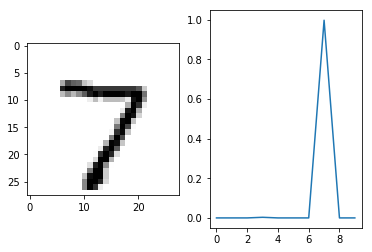

In [49]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(x_test[0], cmap=plt.cm.binary)
ax[1].plot(range(10), predictions[0])
plt.show()

In [113]:
def animate_results(img_frames, pred_frames, save='no'):
    fig, ax = plt.subplots(1, 2)
    
    im = ax[0].imshow(img_frames[0], cmap=plt.cm.binary, origin='upper')
    pr, = ax[1].plot(range(10), pred_frames[0])
    
    def animate(i):
        im.set_array(img_frames[i])
        pr.set_data(range(10), pred_frames[i])
    
    ani = FuncAnimation(fig, animate, frames=120, interval=1000)
    plt.close('all')
    
    if save.lower() == 'yes':
        ani.save('tf-demo2.gif', writer='pillow')
    return ani

In [114]:
animate_results(x_test, predictions, 'no')

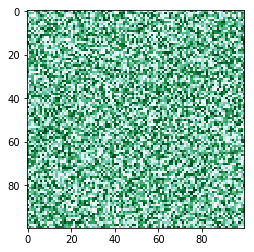

In [48]:
# ax.imshow()

grid = np.random.randint(1500, size=(100, 100))

fig, ax = plt.subplots()
ax.imshow(grid, cmap=plt.cm.BuGn)
plt.show()